# Project 1: Investigating GAPMINDER WORLD

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

## Introduction
The selected data is from the Gapminder world and 5 different indicators were selected for the analysis, namely: population_total, income_per_person_gdppercapita_ppp_inflation_adjusted, life_expectancy_years, children_per_woman_total_fertility and child_mortality_0_5_year_olds_dying_per_1000_born. In this project I am going to use population as a primary dependent variable and life expectancy as a secondary dependent variable. There are 64113 observations and 7 features to start with and for further analysis, will be subset using 2 criterias:

1. Two dataset will be explored and compared, i.e. the country with the maximum recorded total population and the country with the lowest recorded population.
2. The above selected dataset will also be filtered for data recorded from 1950 and onwards.


### Question(s) for Analysis
Q1. Besides the significant population difference between India and Brunei, what other trends in terms of fluctuations are observed over the given time period 1800 to 2050?

Q2. What are the notable differences and similarities between India and Brunei, with regards to life expectancy, children per woman, child mortality from 1950 going onwards?

Q3. Which factors significatly contribute to the increase in population for Brunei and India from 1950 going forward?

Q4. Which country has the highest average life expectancy and by how much does its life expectancy contribute to the total population?

Q5. Which notable trends are common to both countries?

Q6. Is there relationship between children_per_woman_total_fertility and child_mortality_0_5_year_olds_dying_per_1000_born and how do they both affect or contribute to the total population life expectancy years in Brunei?

###### Importing the needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import reduce
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Data Wrangling



###### Loading dataset

In [2]:
# LOADING DATASET
income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
life_expectancy_df = pd.read_csv('life_expectancy_years.csv')
population_df = pd.read_csv('population_total.csv')
child_mortality_df = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
children_per_woman_df = pd.read_csv('children_per_woman_total_fertility.csv')

In [3]:
income_df.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan   683   683   683   683   683   683   683   683   683   
1                Angola   700   702   705   709   711   714   718   721   725   
2               Albania   755   755   755   755   755   756   756   756   756   
3               Andorra  1360  1360  1360  1360  1370  1370  1370  1370  1380   
4  United Arab Emirates  1130  1130  1140  1140  1150  1150  1160  1160  1160   

   ...   2041   2042   2043   2044   2045   2046   2047   2048   2049   2050  
0  ...   2690   2750   2810   2870   2930   2990   3060   3120   3190   3260  
1  ...   8000   8170   8350   8530   8710   8900   9090   9280   9480   9690  
2  ...  25.1k  25.6k  26.2k  26.7k  27.3k  27.9k  28.5k  29.1k  29.7k  30.4k  
3  ...  68.9k  70.4k  71.9k  73.4k    75k  76.6k  78.3k    80k  81.7k  83.4k  
4  ...   101k   103k   105k   107k   110k   112k   114k   117k   119k   122k  

[5 rows x 252 columns]

In [4]:
life_expectancy_df.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
1                Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2               Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  ...  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  ...  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]

In [5]:
child_mortality_df.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  469.0  469.0  469.0  469.0  469.0  469.0  470.0   
1                Angola  486.0  486.0  486.0  486.0  486.0  486.0  486.0   
2               Albania  375.0  375.0  375.0  375.0  375.0  375.0  375.0   
3               Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4  United Arab Emirates  434.0  434.0  434.0  434.0  434.0  434.0  434.0   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  470.0  470.0  ...  12.60  12.40  12.20  12.00  11.80  11.60  11.50  11.30   
1  486.0  486.0  ...  17.70  17.50  17.30  17.10  17.00  16.80  16.60  16.40   
2  375.0  375.0  ...   2.32   2.30   2.27   2.24   2.22   2.19   2.16   2.14   
3    NaN    NaN  ...   0.86   0.84   0.83   0.81   0.80   0.79   0.78   0.77   
4  434.0  434.0  ...   2.31   2.29   2.26   2.24   2.22   2.19   2.17   2.15   

    2099   2100  
0  11.10  11.10  
1  16.30  16.30  
2   2.11   2.11  
3   0.76   0.76  
4   2.13   2.13  

[5 rows x 302 columns]

In [6]:
children_per_woman_df.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0                 Aruba  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64  5.64   
1           Afghanistan  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
2                Angola  6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94  6.94   
3               Albania  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
4  Netherlands Antilles  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80  5.80   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.82  1.83  1.83  
1  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  1.74  
2  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43  2.42  2.40  2.40  
3  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79  1.79  1.79  1.79  
4  ...  2.00  2.00  2.01  2.01  2.01  2.01  2.01  2.02  2.02  2.02  

[5 rows x 302 columns]

In [7]:
population_df.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2               Albania   400k   402k   404k   405k   407k   409k   411k   
3               Andorra   2650   2650   2650   2650   2650   2650   2650   
4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  3.28M  3.28M  ...  76.6M  76.4M  76.3M  76.1M    76M  75.8M  75.6M  75.4M   
1  1.57M  1.57M  ...   168M   170M   172M   175M   177M   179M   182M   184M   
2   413k   414k  ...  1.33M   1.3M  1.27M  1.25M  1.22M  1.19M  1.17M  1.14M   
3   2650   2650  ...    63k  62.9k  62.9k  62.8k  62.7k  62.7k  62.6k  62.5k   
4  40.2k  40.2k  ...  12.3M  12.4M  12.5M  12.5M  12.6M  12.7M  12.7M  12.8M   

    2099   2100  
0  75.2M  74.9M  
1   186M   188M  
2  1.11M  1.09M  
3  62.5k  62.4k  
4  12.8M  12.9M  

[5 rows x 302 columns]

###### Re-structuring of the dataset - melting
Changing the dataframe from wide to long so as to better unders the nature of the dataset

In [8]:
income_df = income_df.melt(id_vars =['country'], var_name='year', value_name='income')
income_df.head()

country  year income
0           Afghanistan  1800    683
1                Angola  1800    700
2               Albania  1800    755
3               Andorra  1800   1360
4  United Arab Emirates  1800   1130

In [9]:
life_expectancy_df = life_expectancy_df.melt(id_vars =['country'], var_name='year', value_name='life_expectancy')
life_expectancy_df.head()

country  year  life_expectancy
0           Afghanistan  1800             28.2
1                Angola  1800             27.0
2               Albania  1800             35.4
3               Andorra  1800              NaN
4  United Arab Emirates  1800             30.7

In [10]:
child_mortality_df = child_mortality_df.melt(id_vars =['country'], var_name='year', value_name='child_mortality')
child_mortality_df.head()

country  year  child_mortality
0           Afghanistan  1800            469.0
1                Angola  1800            486.0
2               Albania  1800            375.0
3               Andorra  1800              NaN
4  United Arab Emirates  1800            434.0

In [11]:
children_per_woman_df = children_per_woman_df.melt(id_vars =['country'], var_name='year', value_name='children_per_woman')
children_per_woman_df.head()

country  year  children_per_woman
0                 Aruba  1800                5.64
1           Afghanistan  1800                7.00
2                Angola  1800                6.93
3               Albania  1800                4.60
4  Netherlands Antilles  1800                5.80

In [12]:
population_df = population_df.melt(id_vars =['country'], var_name='year', value_name='population')
population_df.head()

country  year population
0           Afghanistan  1800      3.28M
1                Angola  1800      1.57M
2               Albania  1800       400k
3               Andorra  1800       2650
4  United Arab Emirates  1800      40.2k

#### Merging the dataframes
For ease of manipulating and analysing data

In [13]:
# list of DataFrames
data_df =  [income_df, population_df, life_expectancy_df, child_mortality_df, children_per_woman_df,]

#merging all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left, right, on=["country", "year"], how='outer'), data_df)
final_df.head()

country  year income population  life_expectancy  \
0           Afghanistan  1800    683      3.28M             28.2   
1                Angola  1800    700      1.57M             27.0   
2               Albania  1800    755       400k             35.4   
3               Andorra  1800   1360       2650              NaN   
4  United Arab Emirates  1800   1130      40.2k             30.7   

   child_mortality  children_per_woman  
0            469.0                7.00  
1            486.0                6.93  
2            375.0                4.60  
3              NaN                 NaN  
4            434.0                6.94

In [14]:
final_df.info() #Column names, datatypes, column labels
final_df.shape #number of columns and rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64113 entries, 0 to 64112
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             64113 non-null  object 
 1   year                64113 non-null  object 
 2   income              48945 non-null  object 
 3   population          59297 non-null  object 
 4   life_expectancy     56616 non-null  float64
 5   child_mortality     57497 non-null  float64
 6   children_per_woman  60715 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.9+ MB


(64113, 7)

##### Null values

In [15]:
final_df.isnull().sum()/len(final_df) # proportion of columns with missing values

country               0.000000
year                  0.000000
income                0.236582
population            0.075117
life_expectancy       0.116934
child_mortality       0.103193
children_per_woman    0.053000
dtype: float64

##### Datatypes

In [16]:
final_df.dtypes

country                object
year                   object
income                 object
population             object
life_expectancy       float64
child_mortality       float64
children_per_woman    float64
dtype: object

## Data Cleaning

In [17]:
final_df.dropna(inplace = True) #drop rows with NaN values

In [18]:
final_df.info()
print(final_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46536 entries, 0 to 48944
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             46536 non-null  object 
 1   year                46536 non-null  object 
 2   income              46536 non-null  object 
 3   population          46536 non-null  object 
 4   life_expectancy     46536 non-null  float64
 5   child_mortality     46536 non-null  float64
 6   children_per_woman  46536 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.8+ MB
(46536, 7)


##### Datatype conversion

In [19]:
#converting string to int
final_df['population'] = final_df['population'].replace({'B': '*1e9', 'k':'*1e3', 'M': '*1e6', '-':'-1'}, regex =True).map(pd.eval).astype(int)
final_df['population'].head()

0    3280000
1    1570000
2     400000
4      40200
5     534000
Name: population, dtype: int32

In [20]:
#converting string to int
final_df['income'] = final_df['income'].replace({'B': '*1e9', 'k': '*1e3', 'M': '*1e6', '-':'-1'}, regex =True).map(pd.eval).astype(float)
final_df['income'].head()

0     683.0
1     700.0
2     755.0
4    1130.0
5    1730.0
Name: income, dtype: float64

In [21]:
#converting string to int
final_df['year'] = final_df['year'].astype(int)
final_df['year'].head()

0    1800
1    1800
2    1800
4    1800
5    1800
Name: year, dtype: int32

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46536 entries, 0 to 48944
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             46536 non-null  object 
 1   year                46536 non-null  int32  
 2   income              46536 non-null  float64
 3   population          46536 non-null  int32  
 4   life_expectancy     46536 non-null  float64
 5   child_mortality     46536 non-null  float64
 6   children_per_woman  46536 non-null  float64
dtypes: float64(4), int32(2), object(1)
memory usage: 2.5+ MB


The data is now ready to be analysed

In [23]:
final_df.shape #number of rows and columns

(46536, 7)

## Exploratory Data Analysis

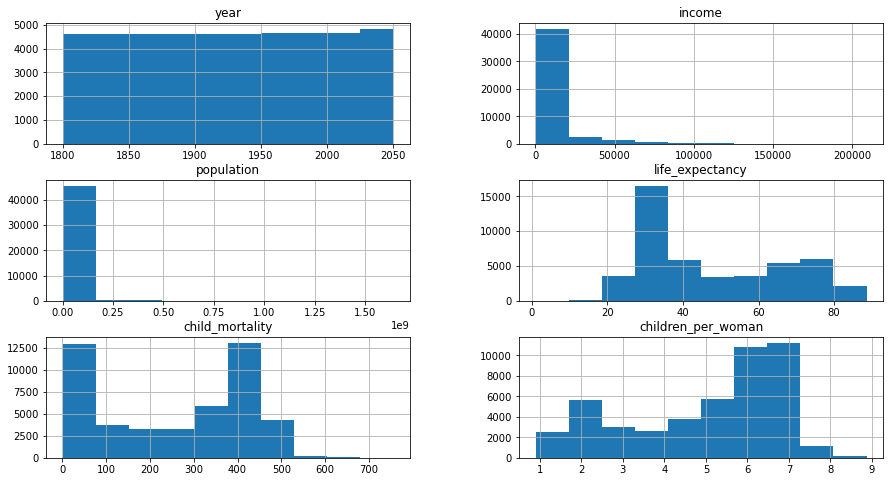

In [24]:
final_df.hist(figsize=(15,8));

From the above histograms, the following were noted:
    1.population - right skewed
    2.income -     right skewed

In [25]:
# Relationship between population and life expectancy in the entire dataset
plt.scatter(final_df['population'], final_df['life_expectancy'])
plt.xlabel('Total population')
plt.ylabel('Life_expectancy_years')
plt.title('Total population vs Life_expectancy_years');

In this project I am going to use population as a primary dependent variable and life expectancy as a secondary dependent variable. Two dataset will be explored and compared, i.e. the country with the maximum recorded total population and the country with the lowest recorded population.

In [26]:
#Filtering the country that has recorded the highest recorded total population
Highest_population = final_df.groupby('country')['population'].max().sort_values(ascending = False)
Highest_population.head(1)

country
India    1640000000
Name: population, dtype: int32

In [27]:
# subsetting final_df to have data from India
df_india = final_df[final_df['country'] == 'India']
df_india.head()

country  year  income  population  life_expectancy  child_mortality  \
78    India  1800  1200.0   201000000             25.4            509.0   
273   India  1801  1200.0   201000000             25.4            509.0   
468   India  1802  1200.0   202000000             25.0            509.0   
663   India  1803  1190.0   202000000             24.0            509.0   
858   India  1804  1180.0   202000000             23.5            509.0   

     children_per_woman  
78                 5.95  
273                5.95  
468                5.95  
663                5.95  
858                5.95

In [28]:
df_india.describe() # DESCRIPTION OF THE DATA IN THE DATAFRAME

year        income    population  life_expectancy  \
count   251.000000    251.000000  2.510000e+02       251.000000   
mean   1925.000000   2849.262948  5.791315e+08        41.131912   
std      72.601653   3846.613456  4.645119e+08        18.766823   
min    1800.000000    980.000000  2.010000e+08         9.310000   
25%    1862.500000   1100.000000  2.475000e+08        25.400000   
50%    1925.000000   1250.000000  3.310000e+08        31.200000   
75%    1987.500000   1665.000000  8.285000e+08        58.450000   
max    2050.000000  17500.000000  1.640000e+09        76.200000   

       child_mortality  children_per_woman  
count       251.000000          251.000000  
mean        314.945020            4.979124  
std         190.480559            1.470516  
min          14.700000            1.840000  
25%         136.000000            4.265000  
50%         294.000000            5.800000  
75%         509.000000            5.950000  
max         537.000000            5.950000

In [29]:
#filtering the country that has recorded the lowest recorded total population
Lowest_population = final_df.groupby('country')['population'].min().sort_values(ascending = False)
Lowest_population.tail(1)

country
Brunei    2260
Name: population, dtype: int32

In [30]:
# subsetting final_df to have data from Brunei
df_brunei = final_df[final_df['country'] == 'Brunei']
df_brunei.head()

country  year  income  population  life_expectancy  child_mortality  \
25   Brunei  1800  1710.0        2260             29.2            455.0   
220  Brunei  1801  1710.0        2260             29.2            455.0   
415  Brunei  1802  1710.0        2260             29.2            455.0   
610  Brunei  1803  1710.0        2260             29.2            455.0   
805  Brunei  1804  1710.0        2260             29.2            455.0   

     children_per_woman  
25                 7.06  
220                7.06  
415                7.06  
610                7.06  
805                7.06

In [31]:
df_brunei.describe() # DESCRIPTION OF THE DATA IN THE DATAFRAME

year         income     population  life_expectancy  \
count   251.000000     251.000000     251.000000       251.000000   
mean   1925.000000   34977.689243  131190.557769        46.929482   
std      72.601653   39604.448329  173404.968099        19.732351   
min    1800.000000    1710.000000    2260.000000        26.300000   
25%    1862.500000    1985.000000    5485.000000        29.200000   
50%    1925.000000    2470.000000   28900.000000        36.700000   
75%    1987.500000   71200.000000  241000.000000        69.050000   
max    2050.000000  142000.000000  493000.000000        78.400000   

       child_mortality  children_per_woman  
count       251.000000          251.000000  
mean        258.104064            5.605339  
std         199.091251            2.187251  
min           6.410000            1.710000  
25%          13.850000            3.695000  
50%         316.000000            7.060000  
75%         455.000000            7.060000  
max         455.000000            7.520000

#### Differences between the two countries

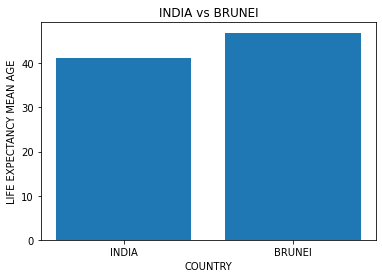

In [32]:
plt.bar(['INDIA', 'BRUNEI'], [df_india.life_expectancy.mean(), df_brunei.life_expectancy.mean()])
plt.ylabel('LIFE EXPECTANCY MEAN AGE')
plt.xlabel('COUNTRY')
plt.title('INDIA vs BRUNEI');

LIFE EXPECTANCY MEAN AGE : INDIA vs BRUNEI

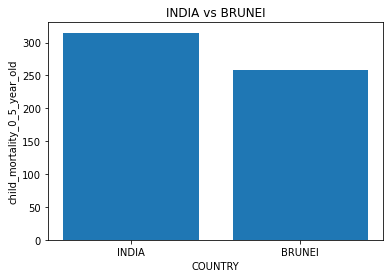

In [33]:
plt.bar(['INDIA', 'BRUNEI'], [df_india.child_mortality.mean(), df_brunei.child_mortality.mean()])
plt.ylabel('child_mortality_0_5_year_old')
plt.xlabel('COUNTRY')
plt.title('INDIA vs BRUNEI');

In [34]:
plt.bar(['INDIA', 'BRUNEI'], [df_india.children_per_woman.mean(), df_brunei.children_per_woman.mean()])
plt.ylabel('children_per_woman_total_fertility')
plt.xlabel('COUNTRY')
plt.title('INDIA vs BRUNEI');

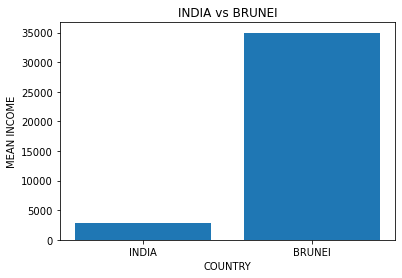

In [35]:
plt.bar(['INDIA', 'BRUNEI'], [df_india.income.mean(), df_brunei.income.mean()])
plt.ylabel('MEAN INCOME')
plt.xlabel('COUNTRY')
plt.title('INDIA vs BRUNEI');

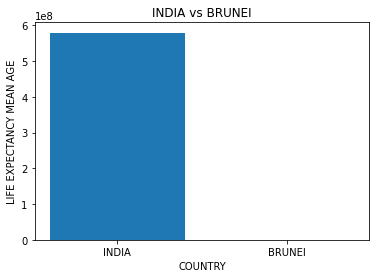

In [36]:
plt.bar(['INDIA', 'BRUNEI'], [df_india.population.mean(), df_brunei.population.mean()])
plt.ylabel('LIFE EXPECTANCY MEAN AGE')
plt.xlabel('COUNTRY')
plt.title('INDIA vs BRUNEI');

#### Relationship between population and life expectancy? other factors considered as well

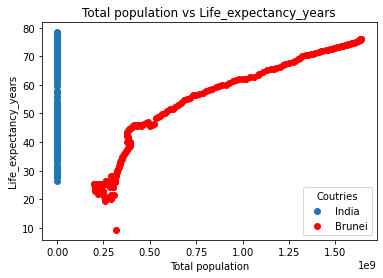

In [37]:
plt.subplot
plt.scatter(df_brunei['population'],df_brunei['life_expectancy'])
plt.scatter(df_india['population'],df_india['life_expectancy'], color = 'r')
plt.xlabel('Total population')
plt.ylabel('Life_expectancy_years')
plt.title('Total population vs Life_expectancy_years')
plt.legend(['India', 'Brunei'], loc = 'lower right', title = 'Coutries');

A strong positive relationship between population and life_expectancy_years for Brunei

In [38]:
plt.subplot
plt.scatter(df_brunei['population'],df_brunei['income'])
plt.scatter(df_india['population'],df_india['income'], color = 'r')
plt.xlabel('Total population')
plt.ylabel('Income_per_person_gdp')
plt.title('Total population vs income_per_person')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries' );

A weak positive relationship between population and income for Brunei.

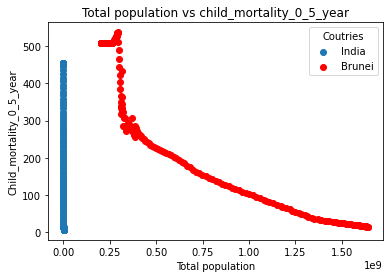

In [39]:
plt.subplot
plt.scatter(df_brunei['population'],df_brunei['child_mortality'])
plt.scatter(df_india['population'],df_india['child_mortality'], color = 'r')
plt.xlabel('Total population')
plt.ylabel('Child_mortality_0_5_year')
plt.title('Total population vs child_mortality_0_5_year')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries');

In [40]:
plt.subplot
plt.scatter(df_brunei['population'],df_brunei['children_per_woman'])
plt.scatter(df_india['population'],df_india['children_per_woman'], color = 'r')
plt.xlabel('Total population')
plt.ylabel('Children_per_woman_total_fertility')
plt.title('Total population vs Children_per_woman_total_fertility')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries');

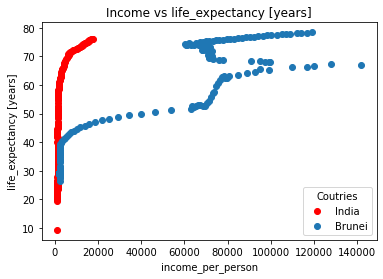

In [41]:
plt.subplot
plt.scatter(df_india['income'],df_india['life_expectancy'], color = 'r')
plt.scatter(df_brunei['income'],df_brunei['life_expectancy'])
plt.xlabel('income_per_person')
plt.ylabel('life_expectancy [years]')
plt.title('Income vs life_expectancy [years]')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries');

In [42]:
plt.subplot
plt.scatter(df_india['child_mortality'],df_india['life_expectancy'], color = 'r')
plt.scatter(df_brunei['child_mortality'],df_brunei['life_expectancy'])
plt.xlabel('Child_mortality_0_5_year_olds')
plt.ylabel('Life_expectancy [years]')
plt.title('Income vs life_expectancy [years]')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries');

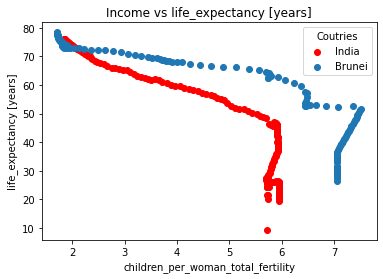

In [43]:
plt.subplot
plt.scatter(df_india['children_per_woman'],df_india['life_expectancy'], color = 'r')
plt.scatter(df_brunei['children_per_woman'],df_brunei['life_expectancy'])
plt.xlabel('children_per_woman_total_fertility')
plt.ylabel('life_expectancy [years]')
plt.title('Income vs life_expectancy [years]')
plt.legend(['India', 'Brunei'], loc = 'best', title = 'Coutries');

##### Distributions from 1950

In [44]:
#Filtering only the data from 1950 going up for Brunei
Brunei_subset = df_brunei[df_brunei['year'] > 1950]
Brunei_subset.head()

country  year   income  population  life_expectancy  child_mortality  \
29470  Brunei  1951  63700.0       50900             52.6            144.0   
29665  Brunei  1952  64600.0       53900             52.3            139.0   
29860  Brunei  1953  65500.0       56900             52.6            135.0   
30055  Brunei  1954  66500.0       60100             53.0            129.0   
30250  Brunei  1955  67400.0       63400             52.9            124.0   

       children_per_woman  
29470                7.36  
29665                7.07  
29860                6.84  
30055                6.66  
30250                6.54

In [45]:
#Filtering only the data from 1950 going up for India
India_subset = df_india[df_india['year'] > 1950]
India_subset.head()

country  year  income  population  life_expectancy  child_mortality  \
29523   India  1951  1150.0   382000000             44.0            281.0   
29718   India  1952  1170.0   389000000             44.5            276.0   
29913   India  1953  1220.0   396000000             44.8            271.0   
30108   India  1954  1250.0   403000000             45.4            267.0   
30303   India  1955  1250.0   410000000             45.8            262.0   

       children_per_woman  
29523                 5.9  
29718                 5.9  
29913                 5.9  
30108                 5.9  
30303                 5.9

In [46]:
Brunei_subset.value_counts().sum() == India_subset.value_counts().sum()

True

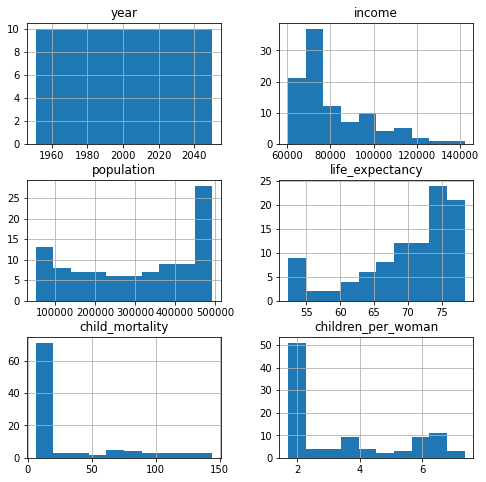

In [47]:
#Distribution of the Brunei dataset
Brunei_subset.hist(figsize= (8,8), grid = True);

In [48]:
#Distribution of the India dataset
India_subset.hist(figsize = (15, 8));

In [49]:
plt.bar(['INCOME', 'POPULATION'], [Brunei_subset.income.mean(), Brunei_subset.population.mean() ])
plt.ylabel('TOTAL')
plt.xlabel('BRUNEI')
plt.title('Mean income vs Mean Population');

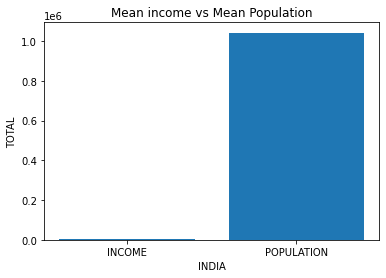

In [50]:
plt.bar(['INCOME', 'POPULATION'], [India_subset.income.mean(), India_subset.population.mean()/1000])
plt.ylabel('TOTAL')
plt.xlabel('INDIA')
plt.title('Mean income vs Mean Population');

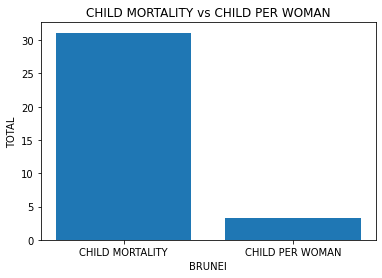

In [51]:
plt.bar(['CHILD MORTALITY', 'CHILD PER WOMAN'], [Brunei_subset.child_mortality.mean(), Brunei_subset.children_per_woman.mean() ])
plt.ylabel('TOTAL')
plt.xlabel('BRUNEI')
plt.title('CHILD MORTALITY vs CHILD PER WOMAN')
plt.show();

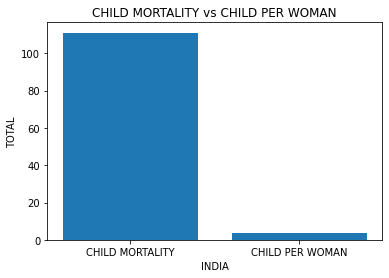

In [52]:
plt.bar(['CHILD MORTALITY', 'CHILD PER WOMAN'], [India_subset.child_mortality.mean(), India_subset.children_per_woman.mean() ])
plt.ylabel('TOTAL')
plt.xlabel('INDIA')
plt.title('CHILD MORTALITY vs CHILD PER WOMAN')
plt.show();

##### QUESTION 1

###### Besides the significant population difference between India and Brunei, what other trends in terms of fluctuations are observed over the given time period 1800 to 2050?

In [53]:
# a fuction for line plots
def line(dataframe, x_values, x_label, y_values, y_label, title, color):
    dataframe.plot(x= x_values, y = y_values, color = color, figsize = (12,6), grid = True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=12)
    plt.show()

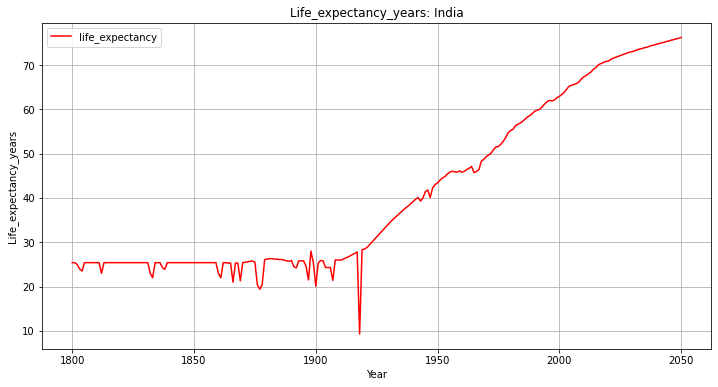

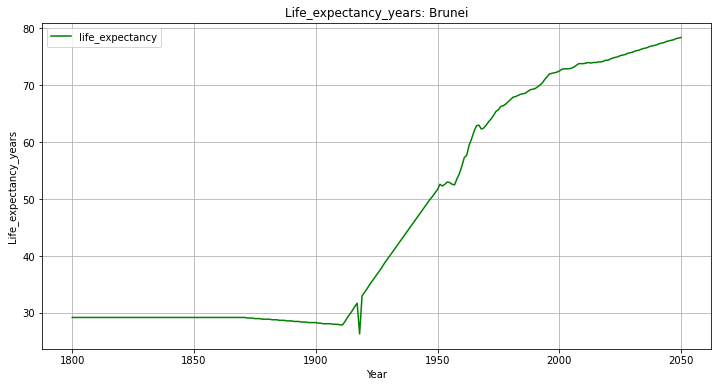

In [54]:
line(df_india,'year', 'Year', 'life_expectancy', 'Life_expectancy_years', 'Life_expectancy_years: India', 'r' )
line(df_brunei,'year', 'Year', 'life_expectancy', 'Life_expectancy_years', 'Life_expectancy_years: Brunei', 'g' )

Brunei has always had a higher record of life_expectancy_years compared to India. However they both experienced a rapid sharp increase around the same time in 1900s after having sharply decreased.

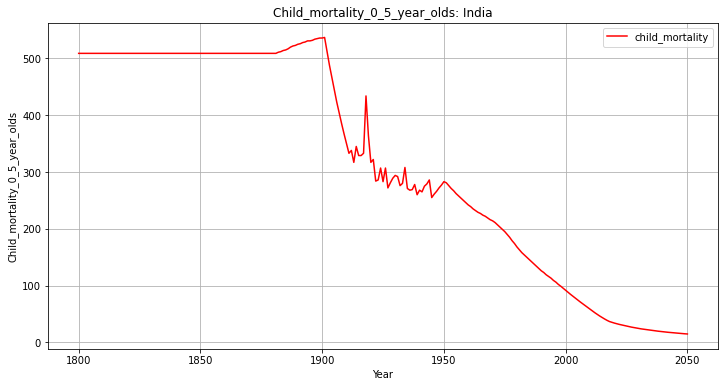

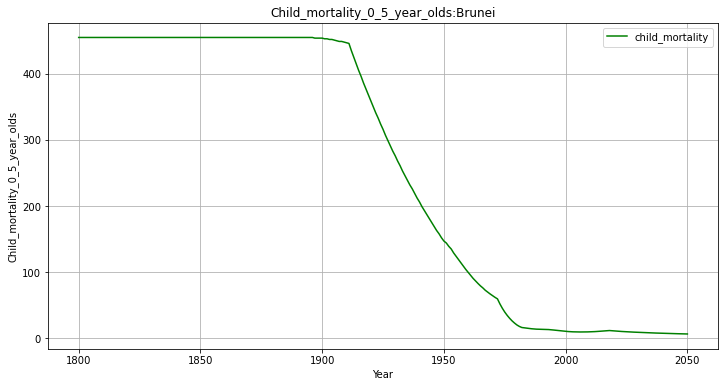

In [55]:
line(df_india,'year', 'Year', 'child_mortality', 'Child_mortality_0_5_year_olds', 'Child_mortality_0_5_year_olds: India', 'r' )
line(df_brunei,'year', 'Year', 'child_mortality', 'Child_mortality_0_5_year_olds', 'Child_mortality_0_5_year_olds:Brunei', 'g' )

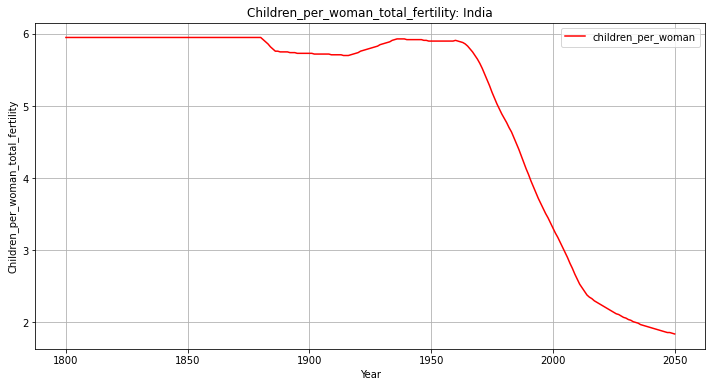

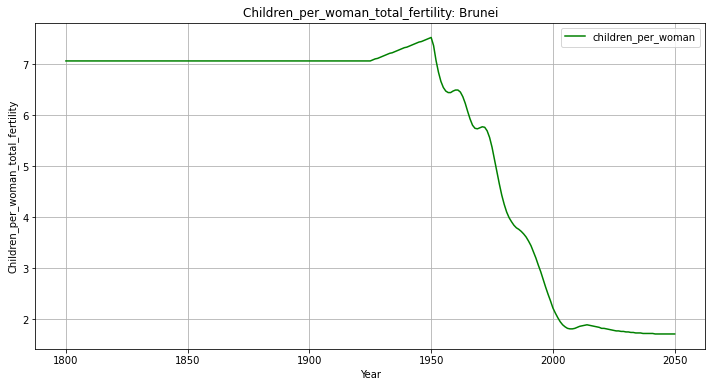

In [56]:
line(df_india,'year', 'Year', 'children_per_woman', 'Children_per_woman_total_fertility', 'Children_per_woman_total_fertility: India', 'r' )
line(df_brunei,'year', 'Year', 'children_per_woman', 'Children_per_woman_total_fertility', 'Children_per_woman_total_fertility: Brunei', 'g' )

Both countries experienced a decline from 1950s and onwards however Brunei which once had the highest record, by the year 2000 and after, it was trending to be having the lowest children_per_woman_total_fertility than India.

In [57]:
line(df_india,'year', 'Year', 'income', 'Income_per_person_gdp', 'Income_per_person_gdp: India', 'r' )
line(df_brunei,'year', 'Year', 'income', 'Income_per_person_gdp', 'Income_per_person_gdp: Brunei', 'g' )

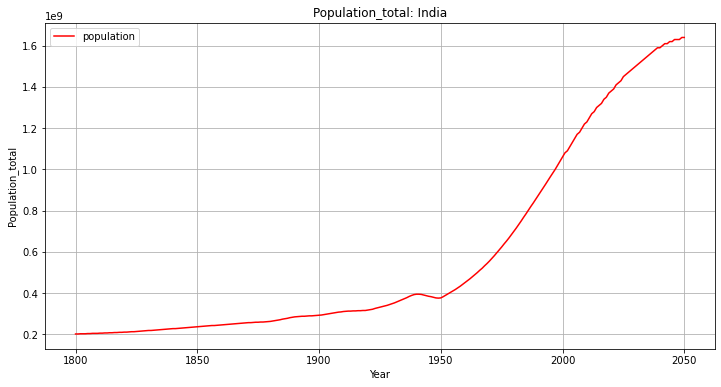

In [58]:
line(df_india,'year', 'Year', 'population', 'Population_total', 'Population_total: India', 'r' )
line(df_brunei,'year', 'Year', 'population', 'Population_total', 'Population_total: Brunei', 'g' );

After 1950 India's population has been increasing significantly year after year. 

### NB: The following questions will be based on the data from 1950 and onwards

#### QUESTION 2

###### What are the notable differences and similarities between India and Brunei, with regards to life expectancy, children per woman, child mortality from 1950 going onwards

In [59]:
plt.bar(['CHILD MORTALITY', 'CHILDREN PER WOMAN', 'LIFE EXPECTANCY'], [Brunei_subset.child_mortality.mean(), Brunei_subset.children_per_woman.mean(), Brunei_subset.life_expectancy.mean() ])
plt.ylabel('Children_per_woman_total_fertility')
plt.xlabel('BRUNEI')
plt.title('Child_mortality vs Life_expectancy_years vs Children_per_woman');

In [60]:
plt.bar(['CHILD MORTALITY', 'CHILDREN PER WOMAN', 'LIFE EXPECTANCY'], [India_subset.child_mortality.mean(), India_subset.children_per_woman.mean(), India_subset.life_expectancy.mean() ])
plt.ylabel('Children_per_woman_total_fertility')
plt.xlabel('INDIA')
plt.title('Child_mortality vs Life_expectancy_years vs Children_per_woman');

India recorded the highest on: child mortality and child per woman.
Brunei has significantly the highest record of life_expectancy_years

##### QUESTION 3A

###### Which factors significatly contribute to the increase in population for Brunei?

In [61]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['income'])
p_corr

0.08721719784927198

In [62]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['child_mortality'])
p_corr

-0.8243690827295428

In [63]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['children_per_woman'])
p_corr

-0.9660942214981186

In [64]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['life_expectancy'])
p_corr

0.9490986390474456

There is a positive correlation between population, life expectancy and income, where its strongest between population and life expectancy.

##### QUESTION 3B

###### Which factors significatly contribute to the increase in population for India?

In [65]:
p_corr = India_subset['population'].corr(India_subset['life_expectancy'])
p_corr

0.994529283282013

In [66]:
p_corr = India_subset['population'].corr(India_subset['income'])
p_corr

0.8736455634135127

In [67]:
p_corr = India_subset['population'].corr(India_subset['children_per_woman'])
p_corr

-0.9897851016864547

In [68]:
p_corr = India_subset['population'].corr(India_subset['child_mortality'])
p_corr

-0.9837574459070023

Income and life expectancy contribute highly to the increase in population in India

##### QUESTION 4

###### Which country has the highest average life expectancy and by how much does its life expectancy contribute to the total population?

In [69]:
line(India_subset,'year', 'Year', 'life_expectancy', 'Life_expectancy_years', 'Life_expectancy_years: India', 'r' )
line(Brunei_subset,'year', 'Year', 'life_expectancy', 'Life_expectancy_years', 'Life_expectancy_years: Brunei', 'g' );

Comparison between the two countries shows that Brunei has always had the highest life_expectancy_years which keeps going up year after year.

In [70]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['life_expectancy'])
p_corr

0.9490986390474456

##### QUESTION 5

###### Are there any notable trends common to both countries?

###### Criteria 1. Population

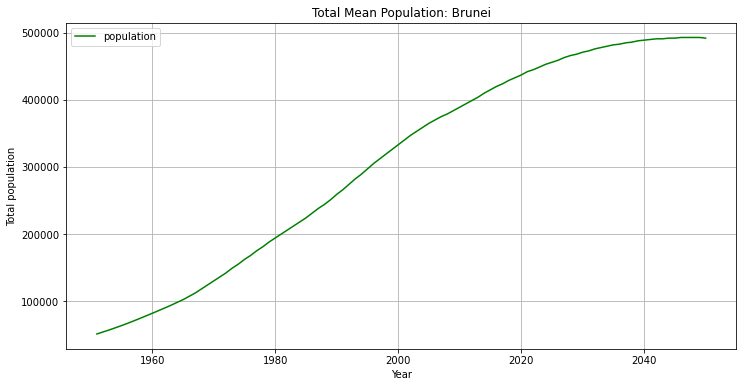

In [71]:
line(India_subset,'year', 'Year', 'population', 'Total population', 'Total Mean Population: India', 'r' )
line(Brunei_subset,'year', 'Year', 'population', 'Total population', 'Total Mean Population: Brunei', 'g' );

Both countries have experienced a significant increase population as evidenced from the graphs year after year

###### Criteria 2 - Income_per_person_gdp

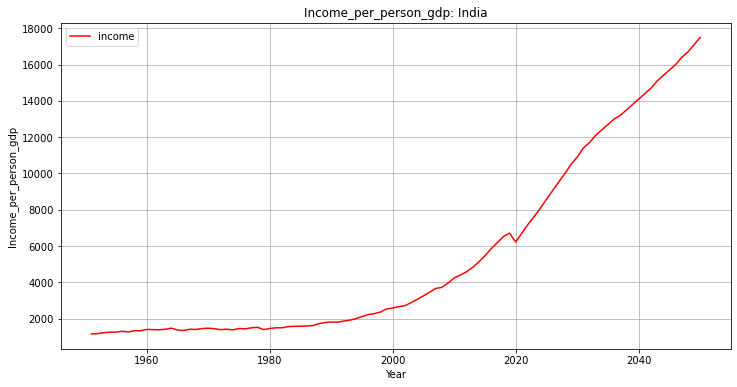

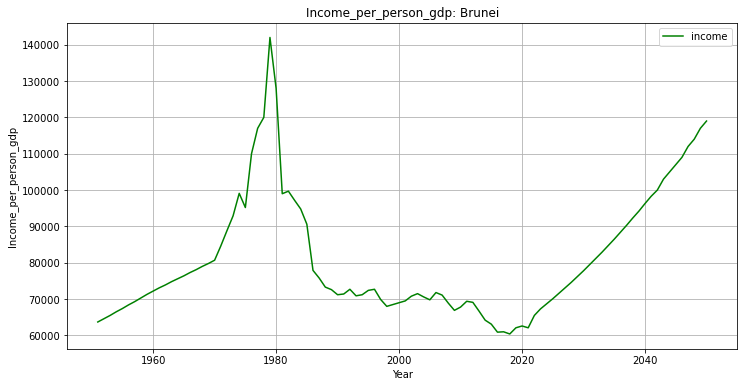

In [72]:
line(India_subset,'year', 'Year', 'income', 'Income_per_person_gdp', 'Income_per_person_gdp: India', 'r' )
line(Brunei_subset,'year', 'Year', 'income', 'Income_per_person_gdp', 'Income_per_person_gdp: Brunei', 'g' );

From the above two plots,we learn that after 2020, both countries experienced a sharp increase in income_per_person_gdppercapita_ppp_inflation, they only varied in amounts.

###### Criteria 3 - Child_mortality_0_5_year_olds_dying_per_1000_born

In [73]:
line(India_subset,'year', 'Year', 'child_mortality', 'Child_mortality_0_5_year_olds', 'Child_mortality_0_5_year_olds_dying_per_1000_born: India', 'r' )
line(Brunei_subset,'year', 'Year', 'child_mortality', 'Child_mortality_0_5_year_olds', 'Child_mortality_0_5_year_olds_dying_per_1000_born: Brunei', 'g' );

From the 1950s both countries experienced a reduction in the child_mortality_0_5_year_olds_dying_per_1000_born cases. For Brunei, the record started stabiling or getting relatively constant from 2000s, whereas for India it started 2020 where the decrease year after year was becoming fairly small.

###### Criteria 4 - children_per_woman_total_fertility

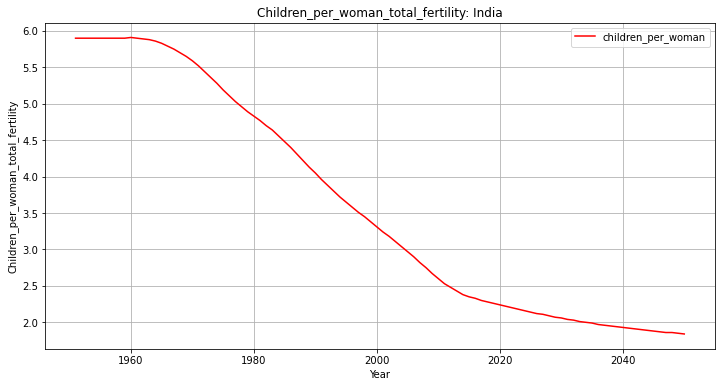

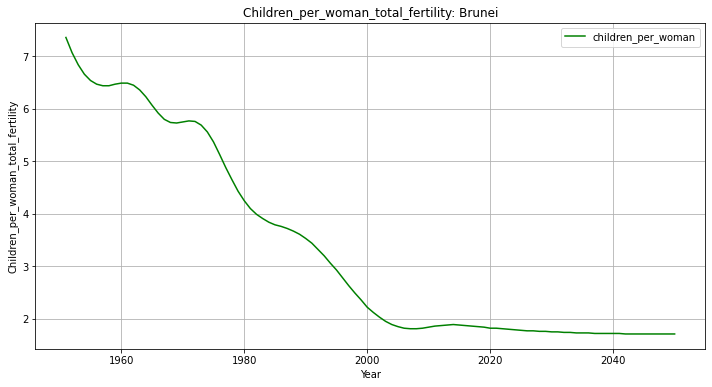

In [74]:
line(India_subset,'year', 'Year', 'children_per_woman', 'Children_per_woman_total_fertility', 'Children_per_woman_total_fertility: India', 'r' )
line(Brunei_subset,'year', 'Year', 'children_per_woman', 'Children_per_woman_total_fertility', 'Children_per_woman_total_fertility: Brunei', 'g' );

Contrary to a history or trend of having the highest record in children_per_woman_total_fertility, towards the 1980s Brunei started experiencing a yearly decline, recording the lowest as compared to India. 

##### QUESTION 6

###### Is there relationship between children_per_woman_total_fertility and child_mortality_0_5_year_olds_dying_per_1000_born and how do they both affect or contribute to the total population life expectancy years in Brunei?

0.8283736369126777


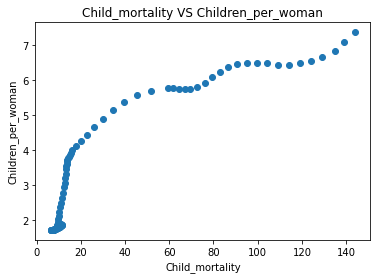

In [75]:
plt.scatter(Brunei_subset['child_mortality'], Brunei_subset['children_per_woman']);
p_corr = df_brunei['child_mortality'].corr(df_brunei['children_per_woman'])
plt.xlabel('Child_mortality')
plt.ylabel('Children_per_woman')
plt.title('Child_mortality VS Children_per_woman')
print(p_corr)

In [76]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['child_mortality'])
p_corr

-0.8243690827295428

In [77]:
p_corr = Brunei_subset['population'].corr(Brunei_subset['children_per_woman'])
p_corr

-0.9660942214981186

In [78]:
p_corr = Brunei_subset['life_expectancy'].corr(Brunei_subset['children_per_woman'])
p_corr

-0.9627062361637827

In [79]:
p_corr = Brunei_subset['life_expectancy'].corr(Brunei_subset['child_mortality'])
p_corr

-0.9468250838449066

There is strong negative correlation amongst the variables thus they do not positively contribute to the increase in the average total population and life expectancy years.

## CONCLUSIONS
The following conclusions were reached:

1. Brunei has always had a higher life expectancy compared to India
2. There is a positive correlation between population, life expectancy and income for Brunei, where its strongest between population and life expectancy.
3. Income and life expectancy contribute highly to the increase in population in India
4. Child_mortality_0_5_year_olds_dying_per_1000_born and children_per_woman_total_fertility do not positively contribute to the increase in the average total population for Brunei 
5. Child_mortality_0_5_year_olds_dying_per_1000_born and children_per_woman_total_fertility do not positively contribute to the increase in the average life expectancy years in Brunei.
6. Both countries have experienced a decline the number of children_per_woman_total_fertility since the 1950s
7. Looking at the graphs we learn that both countries experience a decrease in both child_mortality_0_5_year_olds_dying_per_1000_born and children_per_woman_total_fertility and showed stability around the same time as well in 2020.

## LIMITATIONS

1. The data doesn't give an insight or provide documentation on externall factors (e.g. political and socio-economic issues)that contributed to the various changes observed. This would assist in understanding the different trends observed over the years. For example 'what caused the rapid decline of income_per_person_gdppercapita_ppp_inflation_adjusted of Brunei in the late 1970s as shown in the graph above?'

2. The countries were not grouped by region/continent which would have made it easy to analyse the whole dataset then performing an analysis on particular region(s) incase there were common trends. Manually grouping them would have been time consuming.

## REFERENCES

https://realpython.com/

https://www.statology.org/python-guides/

https://stackoverflow.com/

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html